In [1]:
%env CUDA_VISIBLE_DEVICES=-1

env: CUDA_VISIBLE_DEVICES=-1


In [2]:
import os
import argparse
import tensorflow as tf
import numpy as np

from modules.yielding_ontology.boyonet import BoyoNet
from modules.data_loader import get_processed_datasets
from modules.model_trainer import train_model
from modules.experiment_helper import parse_experiment_settings, \
    prepare_model_save_path, print_sub_exp_settings

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2024-01-30 15:33:51.093735: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-30 15:33:51.173317: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
experiment_path = 'experiments/Kitty.yaml'
experiments = parse_experiment_settings(experiment_path)
sub_exp_settings = experiments[0]
print_sub_exp_settings(sub_exp_settings)

experiment_name = sub_exp_settings['experiment_name']
sub_exp_name = sub_exp_settings['sub_exp_name']
log_path = f'../logs/test'  # f'../logs/{experiment_name}/{sub_exp_name}'
summary_writer = tf.summary.create_file_writer(log_path)
datasets = get_processed_datasets(**sub_exp_settings['data'])
model_save_path = prepare_model_save_path(experiment_name, sub_exp_name)

model:
	cortex_spec:
		kernel_regulation_settings:
			normalize_settings:
				gently: False
				out_weight_len: 1
				normalize_method: L1
				epsilon: 1e-12
			acyclic_subcortex: True
			minimal_weight: 0.013
		PCA_cortex_settings:
			weight_refund: True
			refund_with_amplifier: False
			clean_up_weights: True
			regularize_afterward: False
			nested_type: eye_out_links
			PCA_coverage:
				subcortex_inlink: False
				subcortex_outlink: False
			PCA_settings:
				remained_variance: 1
				transpose: True
				centering: False
				normalizing: True
				leave_out_num: 1
		STDP_cortex_settings:
			init_P_rate: 1.86e-06
			init_D_rate_diff: 0
			learning_rate_settings:
				p_rate_adjust_base: 0
				optimal_output_thresholds: 1
			amplifier_settings:
				amplifier_adjust_base: 0.0005
				optimal_input_thresholds: 1
				upper_bound: 1000
				lower_bound: 0
		neuron_vectors_spec:
			balanced_recent_spike: True
			minimal_threshold: 0.00826
			threshold_weighting_power: 1
			spike_fade_rate: 0

In [6]:
from modules.model_trainer import *
from modules.model_constructor import load_model, construct_model

# new one
# model = construct_model(sub_exp_settings['model'])

# load old one
model = load_model(experiment_name, sub_exp_name)
accuracy_dict, ablation_score = inspect_model(model, datasets, summary_writer, epoch_index=0, level=2, show_fig=False)
print(accuracy_dict)
print(ablation_score)

---------------- model shape ----------------
{   'amplifier': 0.5580235162862366,
    'cortex_id': 'A',
    'input_len': 784,
    'kernel_shape': TensorShape([784, 10]),
    'output_len': 10,
    'p_rate': 1.86e-06,
    'subcortexs': []}
---------------------------------------------
{'train': 0.76108, 'test': 0.7642, 'valid': 0.7565}
1.309000015258789


---------------- model shape ----------------
{   'amplifier': 0.5580235162862366,
    'cortex_id': 'A',
    'input_len': 784,
    'kernel_shape': TensorShape([784, 10]),
    'output_len': 10,
    'p_rate': 1.86e-06,
    'subcortexs': []}
---------------------------------------------


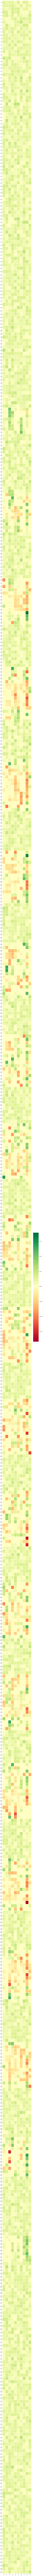

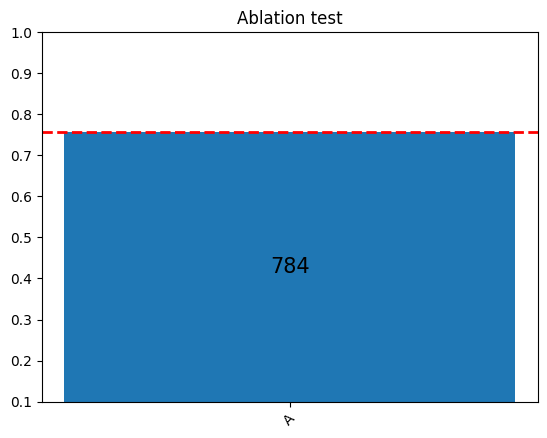

In [7]:
accuracy_dict, ablation_score = inspect_model(model, datasets, summary_writer, epoch_index=0, level=2, show_fig=True)

In [12]:
from modules.model_inspector import get_cortex_dict
from modules.training_helper import ablation_test
cortex_dict = get_cortex_dict(model.cortex)
ablation_score_dict = ablation_test(model, datasets, cortex_dict, 0.7565)

In [13]:
ablation_score_dict

{'A': 0.6524000036120414}

In [28]:
[2**((len(name)-1)/2) * score for name, score in ablation_score_dict.items()]

[0.6524000036120414]

In [20]:
[2**(len(name)/2) * score for name, score in ablation_score_dict.items()]

[0.9226329332004053]

In [8]:
ablation_score

1.3143999576568604

In [8]:
model.cortex.input_nv.thresholds

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.00000

In [17]:
test = tf.random.uniform([10], 0, 3, dtype=tf.int64)
test

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 1, 2, 2, 1, 0, 0, 0, 2])>

In [20]:
non_zero = tf.cast(test != 0, tf.float32)
non_zero

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 1., 1., 1., 0., 0., 0., 1.], dtype=float32)>

In [21]:


def non_zero_mean(tensor_with_zeros):
    non_zero_num = tf.reduce_sum(
        tf.cast(tensor_with_zeros != 0, tf.float32)
    )
    return tf.reduce_sum(tensor_with_zeros) / non_zero_num


In [25]:
non_zero_mean(model.cortex.input_nv.thresholds)

<tf.Tensor: shape=(), dtype=float32, numpy=1.5343273>

In [26]:
model.cortex.input_nv.thresholds.numpy().mean()

0.6556117

In [9]:
import matplotlib.pyplot as plt

hlines=[accuracy_dict['valid']]
bottom=0.1
title='Ablation test'
D=ablation_score

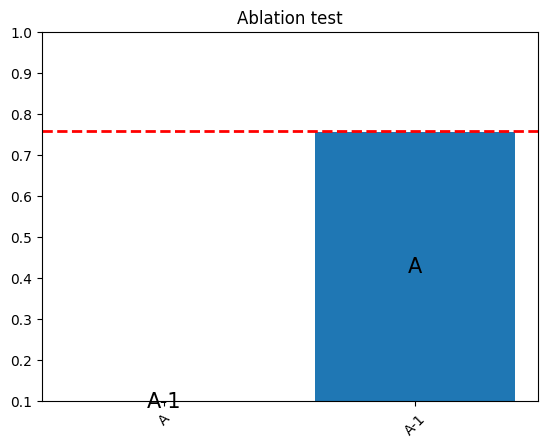

In [33]:
keys, values = zip(*D.items())
bars = plt.bar(keys, values, bottom=bottom)
plt.xticks(rotation=45)
plt.ylim(0.1, 1)
for hline in hlines:
    plt.axhline(y=hline, c="r", ls="--", lw=2)

    
test={
    'A-1':10,
    'A': 20
}
plt.bar_label(bars, labels=test, label_type='center', fontsize=15)

if title is not None:
    plt.title(title)

plt.show()

In [5]:
kernel = np.array(model.cortex.kernel)
kernel

array([[0.12744041, 0.10206234, 0.03798091, ..., 0.07449761, 0.14196555,
        0.05789895],
       [0.0325558 , 0.03618645, 0.12319769, ..., 0.08141887, 0.11745319,
        0.16601226],
       [0.14403273, 0.17520723, 0.17918082, ..., 0.04403198, 0.02810456,
        0.01896504],
       ...,
       [0.04888567, 0.10285823, 0.0438531 , ..., 0.16450301, 0.19299446,
        0.04016336],
       [0.13191396, 0.04483553, 0.17469792, ..., 0.2569028 , 0.04145107,
        0.06457262],
       [0.02163295, 0.04137661, 0.19066128, ..., 0.1241841 , 0.2025032 ,
        0.09382096]], dtype=float32)

In [13]:
model = construct_model(sub_exp_settings['model'])
model.cortex.PCA_settings['leave_out_num'] = 2

In [14]:
new_cortex_in_links, right_matrix, amplifier = model.cortex.PCA(kernel, **model.cortex.PCA_settings)

In [15]:
np.einsum('xy, yz -> xz', new_cortex_in_links, right_matrix) * amplifier/9

array([[0.509762  , 0.40825027, 0.151924  , ..., 0.2979902 , 0.5678623 ,
        0.23159592],
       [0.13022347, 0.14474571, 0.4927907 , ..., 0.32567564, 0.46981287,
        0.66404915],
       [0.5761311 , 0.7008291 , 0.7167232 , ..., 0.17612787, 0.1124182 ,
        0.07586008],
       ...,
       [0.19554274, 0.41143292, 0.17541245, ..., 0.65801215, 0.771978  ,
        0.1606534 ],
       [0.5276559 , 0.17934217, 0.69879156, ..., 1.0276114 , 0.16580422,
        0.2582905 ],
       [0.08653186, 0.16550626, 0.76264507, ..., 0.49673647, 0.81001294,
        0.37528375]], dtype=float32)

In [17]:
right_matrix.shape

(360, 10)

In [18]:
kernel.shape[-1]

10

In [22]:
from modules.training_helper import evaluate_accuracy, ablation_test
accuracy = evaluate_accuracy(model, datasets, valid_only=True)

2023-10-22 05:56:30.980679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-10-22 05:56:30.981840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


In [23]:
from modules.model_inspector import get_cortex_dict
cortex_dict = get_cortex_dict(model.cortex)

In [24]:
ablation_score = ablation_test(model, datasets, cortex_dict, accuracy['valid'])

In [25]:
ablation_score

{'Allen': 0.4836,
 'Edwin': -0.003700018,
 'Christy': 0.0011000037,
 'Steven': -0.0035000443,
 'John': -0.0024000406,
 'Mary': -0.003000021,
 'Myron': -0.0031000376,
 'Frank': 0.013199985,
 'Laura': 0.0031999946,
 'David': 0.0,
 'Clifton': -0.0028000474,
 'Stella': 0.06709999}

In [26]:
accuracy['valid']

0.7488

In [27]:
ablation_score.keys()

dict_keys(['Allen', 'Edwin', 'Christy', 'Steven', 'John', 'Mary', 'Myron', 'Frank', 'Laura', 'David', 'Clifton', 'Stella'])

In [28]:
ablation_score.values()

dict_values([0.4836, -0.003700018, 0.0011000037, -0.0035000443, -0.0024000406, -0.003000021, -0.0031000376, 0.013199985, 0.0031999946, 0.0, -0.0028000474, 0.06709999])

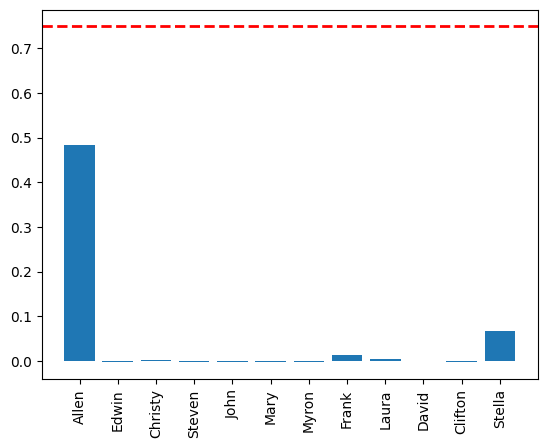

In [44]:
import matplotlib.pyplot as plt

keys, values = zip(*ablation_score.items())

plt.bar(keys, values)
plt.xticks(rotation='vertical')
plt.axhline(y=accuracy['valid'], c="r", ls="--", lw=2)
plt.show()

In [48]:
matrix = draw_bar_chart(ablation_score, hlines=[accuracy['valid']], show=False)

/tmp/ipykernel_542263/1092761325.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  RGB_matrix = imageio.imread(tmp_file_name)


In [19]:
accuracy = evaluate_accuracy(model, datasets, valid_only=True)

In [20]:
accuracy['valid']

0.7514

In [19]:
model = load_model(experiment_name, sub_exp_name)

In [20]:
model.cortex.kernel

<tf.Tensor: shape=(784, 10), dtype=float32, numpy=
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)>

In [8]:
for i in range(5):
    model = load_model(experiment_name, sub_exp_name)
    PCA_settings = {
        'remained_variance': 0.95,
        'transpose': True,
        'centering': False,
        'normalizing': True
    }
    model.sleep(PCA_settings)
    remember(model, datasets['train'], label_off_value, spike_overwrite, STDP_freq=0)
    score = evaluate(model, datasets, summary_writer, 0)
    print(score)

remember, runtime: 0:00:05.421328
Now evaluating: epoch #0
---------------- model shape ----------------
{   'amplifier': 8.0,
    'cortex_id': 'Eli',
    'input_len': 784,
    'kernel_shape': TensorShape([794, 20]),
    'output_len': 10,
    'subcortexs': [   {   'amplifier': 2.637812376022339,
                          'cortex_id': 'Angela',
                          'input_len': 10,
                          'kernel_shape': (10, 10),
                          'output_len': 10,
                          'subcortexs': []}]}
---------------------------------------------
evaluate, runtime: 0:00:31.752872
0.6206
remember, runtime: 0:00:05.453667
Now evaluating: epoch #0
---------------- model shape ----------------
{   'amplifier': 8.0,
    'cortex_id': 'Eli',
    'input_len': 784,
    'kernel_shape': TensorShape([794, 20]),
    'output_len': 10,
    'subcortexs': [   {   'amplifier': 2.6378133296966553,
                          'cortex_id': 'Cecile',
                          'input_le

In [9]:
import cur

In [10]:
model = load_model(experiment_name, sub_exp_name)
kernel = np.array(model.cortex.kernel)

In [44]:
from cur import cur_decomposition
C, U, R = cur_decomposition(kernel, 1)

In [45]:
C

array([[ 0.06356999],
       [ 0.32822993],
       [ 0.50185907],
       [ 0.05666748],
       [ 0.20055945],
       [ 0.47625   ],
       [ 0.28715375],
       [ 0.30011287],
       [ 0.4829909 ],
       [ 0.2723199 ],
       [ 0.        ],
       [ 0.41618958],
       [ 0.22078218],
       [ 0.15264606],
       [ 0.34516847],
       [ 0.49436936],
       [ 0.4660902 ],
       [ 0.40723872],
       [ 0.58004636],
       [ 0.22999117],
       [ 0.4387669 ],
       [ 0.16578174],
       [ 0.18691178],
       [ 0.12646522],
       [ 0.5393319 ],
       [ 0.04088209],
       [ 0.04362509],
       [ 0.47681564],
       [ 0.40651226],
       [ 0.39380345],
       [ 0.1956273 ],
       [ 0.05879509],
       [ 0.3954802 ],
       [ 0.48388925],
       [ 0.24505182],
       [ 0.37431058],
       [ 0.48211247],
       [ 0.42981216],
       [ 0.12133971],
       [ 0.3058605 ],
       [ 0.49858087],
       [ 0.31151167],
       [ 0.10907593],
       [ 0.10024529],
       [ 0.40651873],
       [ 0

In [46]:
C.shape

(784, 1)

In [47]:
U.shape

(1, 1)

In [48]:
R.shape

(1, 10)

In [49]:
restore = tf.einsum('ab,bc,cd -> ad', C, U, R)
restore

<tf.Tensor: shape=(784, 10), dtype=float32, numpy=
array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)>

In [36]:
kernel

array([[0.04871815, 0.1111082 , 0.2034889 , ..., 0.03129155, 0.06588888,
        0.13949794],
       [0.        , 0.12829661, 0.11406811, ..., 0.08974407, 0.06856169,
        0.2022821 ],
       [0.07438593, 0.12148266, 0.        , ..., 0.12825947, 0.0324007 ,
        0.08792039],
       ...,
       [0.06495331, 0.        , 0.16114582, ..., 0.09496193, 0.06068174,
        0.18932058],
       [0.13437618, 0.        , 0.13955423, ..., 0.09643447, 0.12112297,
        0.04982537],
       [0.13119924, 0.09099764, 0.19126475, ..., 0.16488345, 0.01397738,
        0.18770875]], dtype=float32)

In [33]:
C

array([[0.02010259, 0.05283194, 0.02010259, ..., 0.08799104, 0.22782612,
        0.02010259],
       [0.10379541, 0.        , 0.10379541, ..., 0.10160324, 0.12771063,
        0.10379541],
       [0.15870176, 0.08066713, 0.15870176, ..., 0.096207  , 0.        ,
        0.15870176],
       ...,
       [0.0500435 , 0.07043801, 0.0500435 , ..., 0.        , 0.18041882,
        0.0500435 ],
       [0.12581503, 0.145723  , 0.12581503, ..., 0.        , 0.15624487,
        0.12581503],
       [0.04751055, 0.14227779, 0.04751055, ..., 0.07206468, 0.21413995,
        0.04751055]], dtype=float32)

In [35]:
restore - kernel

<tf.Tensor: shape=(784, 10), dtype=float32, numpy=
array([[ 4.52760634e+24,  1.37825851e+25, -1.17873318e+24, ...,
        -2.54691428e+25, -3.91622388e+24, -8.84601564e+24],
       [ 2.28110616e+25, -1.10739667e+25,  1.96692285e+24, ...,
         7.04951548e+24, -2.65478531e+25, -1.80558172e+25],
       [ 4.47995874e+25, -1.41751319e+25,  5.42290465e+24, ...,
         3.06015044e+25, -4.97084735e+25, -6.31198410e+24],
       ...,
       [ 5.99354545e+24,  2.28363797e+25,  1.05761482e+24, ...,
         1.71925119e+25, -1.11247921e+25, -5.05070123e+24],
       [ 2.05019696e+25,  1.49143355e+25,  1.20670176e+24, ...,
         6.68522226e+24, -2.48039348e+25, -2.53078307e+25],
       [ 5.21035146e+24,  3.08389245e+23,  1.32333469e+24, ...,
         1.05753316e+25, -4.78404836e+24, -1.15549759e+25]], dtype=float32)>